In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt 
import seaborn as sns
from PIL import Image


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, t

## Content

***The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.***

***It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.***

In [3]:
df = pd.read_csv("creditcard.csv")

In [4]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#shape of the data
df.shape

(284807, 31)

In [115]:
#checking the null values
df.isnull().values.any()

False

In [6]:
#checking the count distribution of target variable
print('No Fraud:',round(df['Class'].value_counts()[0]/len(df)*100,2))
print('Fraud:', round(df['Class'].value_counts()[1]/len(df)*100,2))

No Fraud: 99.83
Fraud: 0.17


<AxesSubplot:xlabel='Class', ylabel='count'>

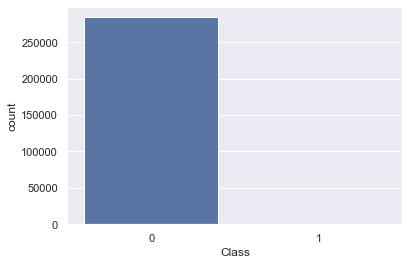

In [7]:
sns.set_theme(style="darkgrid")

sns.countplot(x="Class", data=df)


C:\Users\Krishna Vamshi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Krishna Vamshi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


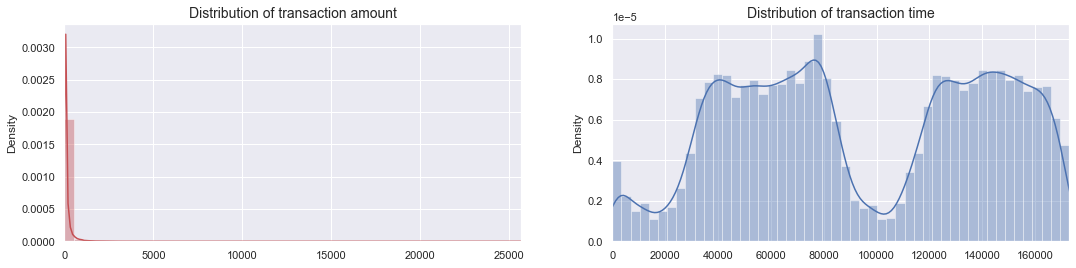

In [8]:
#subplots for distribution of transaction amount and transaction time
fig, ax = plt.subplots(1, 2, figsize = (18, 4))
amount_value = df['Amount'].values
time_value = df['Time'].values

sns.distplot(amount_value, ax=ax[0], color='r')
ax[0].set_title('Distribution of transaction amount', fontsize = 14)
ax[0].set_xlim([min(amount_value), max(amount_value)])

sns.distplot(time_value, ax=ax[1], color = 'b')
ax[1].set_title('Distribution of transaction time', fontsize = 14)
ax[1].set_xlim([min(time_value), max(time_value)])
plt.show()



### Features Scaling

##### Since already data has been scaled, but we should scale the columns which are yet to scale

In [9]:
from sklearn.preprocessing import StandardScaler, RobustScaler
# Robustscaler is less prone to outliers
sc = StandardScaler()
rs = RobustScaler()
df['scale_amount'] = rs.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scale_time'] = rs.fit_transform(df['Time'].values.reshape(-1, 1))
df.drop(['Time', 'Amount'], axis = 1, inplace=True)

In [10]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scale_amount,scale_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [11]:
#lets split the data to X and Y
x = df.iloc[:,:-3]
y = df.iloc[:,-3]

In [12]:
#splitting the data to train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.30, random_state= 1)

### Fitting model in logistic regression with actual data 

In [13]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
accuracy_score(y_test, lr_pred)

0.9991573329588147

### Given the class imbalance ratio, It is  recommend to  measure the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

## Precision-Recall Curves


**Much like the ROC curve, The precision-recall curve is used for evaluating the performance of binary classification algorithms. "It is often used in situations where classes are heavily imbalanced" Also like ROC curves, precision-recall curves provide a graphical representation of a classifier’s performance across many thresholds, rather than a single value (e.g., accuracy, f-1 score, etc.).**

**Precision:** Propoetion of True Positive(TP) cases that are predicted as positive **(tp/tp+fp)**
                 
  The **precision** of a class define how trustable is the result when the model answer that a point belongs to                    that class.


**Recall:** Proportion of True Positive from cases that are actually positive **(tp/tp+fn)**
               
   The **recall** of a class expresses how well the model is able to detect that class.



***The precision-recall curve is constructed by calculating and plotting the precision against the recall for a single classifier at a variety of thresholds. For example, if we use logistic regression, the threshold would be the predicted probability of an observation belonging to the positive class. Normally in logistic regression, if an observation is predicted to belong to the positive class at probability > 0.5, it is labeled as positive. However, we could really choose any probability threshold between 0 and 1. A precision-recall curve helps to visualize how the choice of threshold affects classifier performance, and can even help us select the best threshold for a specific problem.***

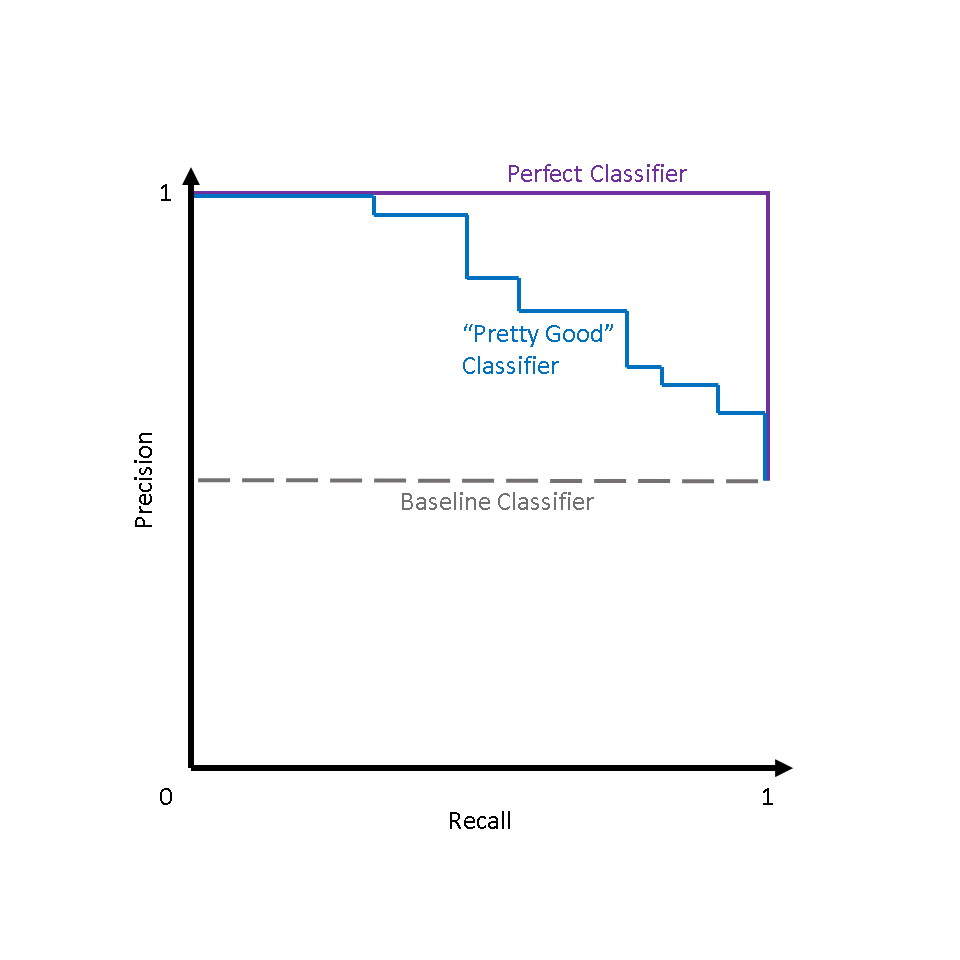

In [109]:
img = Image.open('1_6QPLsDvjo4H6OZrxEBI8Fg.png')
img

***The figure above demonstrates how some theoretical classifiers would plot on a precision-recall curve. The gray dotted line represents a “baseline” classifier — this classifier would simply predict that all instances belong to the positive class. The purple line represents an ideal classifier — one with perfect precision and recall at all thresholds. Nearly all real-world examples will fall somewhere between these two lines — not perfect, but providing better predictions than the “baseline”. A good classifier will maintain both a high precision and high recall across the graph, and will “hug” the upper right corner in the figure below.***


***Generally, the higher the AUC-PR score, the better a classifier performs for the given task.
One way to calculate AUC-PR is to find the AP, or average precision. The documentation for sklearn.metrics.average_precision_score states, “AP summarizes a precision-recall curve as the weighted mean of precision achieved at each threshold, with the increase in recall from the previous threshold used as the weight.” So, we can think of AP as a kind of weighted-average precision across all thresholds.***

In [14]:
# Function to calculate Precision and Recall

def calc_precision_recall(y_true, y_pred):
    
    # Convert predictions to series with index matching y_true
    y_pred = pd.Series(y_pred, index=y_true.index)
    
    # Instantiate counters
    TP = 0
    FP = 0
    FN = 0

    # Determine whether each prediction is TP, FP, TN, or FN
    for i in y_true.index: 
        if y_true[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_true[i]!=y_pred[i]:
           FP += 1
        if y_pred[i]==0 and y_test[i]!=y_pred[i]:
           FN += 1
    
    # Calculate true positive rate and false positive rate
    # Use try-except statements to avoid problem of dividing by 0
    try:
        precision = TP / (TP + FP)
    except:
        precision = 1
    
    try:
        recall = TP / (TP + FN)
    except:
        recall = 1

    return precision, recall

In [15]:
calc_precision_recall(y_test, lr_pred)

(0.8387096774193549, 0.5777777777777777)

***The initial logistic regulation classifier has a precision of 0.83 and recall of 0.57 — not very good! that means model is biased to one classs Now let’s get the full picture using precision-recall curves.***



## Varying the Probability Threshold

To calculate the precision-recall curve, I need to vary the probability threshold that the logistic regression classifier uses to predict whether a transaction is ***normal(target = 0) or fraud(target = 1).*** Remember, while logistic regression is used to assign a class label, what it’s actually doing is determining the probability that an observation belongs to a specific class. ***In a typical binary classification problem, an observation must have a probability of > 0.5 to be assigned to the positive class.*** However, in this case, I will vary that threshold probability value incrementally from 0 to 1.

In [18]:
# LOGISTIC REGRESSION (NO REGULARIZATION)

# Fit and predict test class probabilities
lr = LogisticRegression(max_iter=1000, penalty='none')
lr.fit(x_train, y_train)
y_test_probs = lr.predict_proba(x_test)[:,1]

# Containers for true positive / false positive rates
precision_scores = []
recall_scores = []

# Define probability thresholds to use, between 0 and 1
probability_thresholds = np.linspace(0, 1, num=100)

# Find true positive / false positive rate for each threshold
for p in probability_thresholds:
    
    y_test_preds = []
    
    for prob in y_test_probs:
        if prob > p:
            y_test_preds.append(1)
        else:
            y_test_preds.append(0)
            
    precision, recall = calc_precision_recall(y_test, y_test_preds)
        
    precision_scores.append(precision)
    recall_scores.append(recall)

In [19]:
# LOGISTIC REGRESSION (L2 REGULARIZATION)

# Fit and predict test class probabilities
lr_l2 = LogisticRegression(max_iter=1000, penalty='l2')
lr_l2.fit(x_train, y_train)
y_test_probs = lr_l2.predict_proba(x_test)[:,1]

# Containers for true positive / false positive rates
l2_precision_scores = []
l2_recall_scores = []

# Define probability thresholds to use, between 0 and 1
probability_thresholds = np.linspace(0,1,num=100)

# Find true positive / false positive rate for each threshold
for p in probability_thresholds:
    
    y_test_preds = []
    
    for prob in y_test_probs:
        if prob > p:
            y_test_preds.append(1)
        else:
            y_test_preds.append(0)
            
    precision, recall = calc_precision_recall(y_test, y_test_preds)
        
    l2_precision_scores.append(precision)
    l2_recall_scores.append(recall)

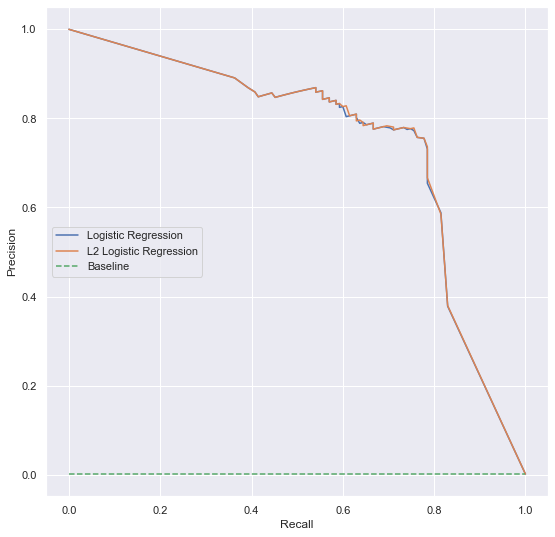

In [21]:
# Plot precision-recall curve

fig, ax = plt.subplots(figsize=(9, 9))
ax.plot(recall_scores, precision_scores, label='Logistic Regression')
ax.plot(l2_recall_scores, l2_precision_scores, label='L2 Logistic Regression')
baseline = len(y_test[y_test==1]) / len(y_test)
ax.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc='center left');

These curves give the shape we would expect — ***at thresholds with low recall, the precision is correspondingly high***, and at ***very high recall, the precision begins to drop.*** The two versions of the classifier have almost same performance, but it looks like the ***l2-regularized version slightly edges out the non-regularized one.***

Additionally, both classifiers can achieve a ***precision score of about 0.8*** while only ***sacrificing minimal recall!***

### Calculating AUC-PR

The AUC-PR score can be calculated using one of two useful functions in ***sklearn.metrics. auc() and average_precision_score()*** will both do the job. The only difference is the ***inputs required for each function:***. auc() takes the ***precision and recall scores*** themselves, and average_precision_score() takes the ***test data labels and the classifier’s test prediction probabilities.***


In [23]:
# Get AUC-PR scores

from sklearn.metrics import auc, average_precision_score

print(f'LR (No reg.) AUC-PR: {round(auc(recall_scores, precision_scores),2)}')
print(f'LR(L2 reg.) AUC-PR: {round(auc(l2_recall_scores, l2_precision_scores),2)}')
print('\n')
print(f'LR (No reg.) Avg. Prec.: {round(average_precision_score(y_test, lr.predict_proba(x_test)[:,1]),2)}')
print(f'LR (L2 reg.) Avg. Prec.: {round(average_precision_score(y_test, lr_l2.predict_proba(x_test)[:,1]),2)}')


LR (No reg.) AUC-PR: 0.75
LR(L2 reg.) AUC-PR: 0.75


LR (No reg.) Avg. Prec.: 0.73
LR (L2 reg.) Avg. Prec.: 0.73


***As expected, the two functions for calculating AUC-PR return the almost same results! The values also confirm what we can see visually on the graph***

### Precision-Recall Curves using sklearn

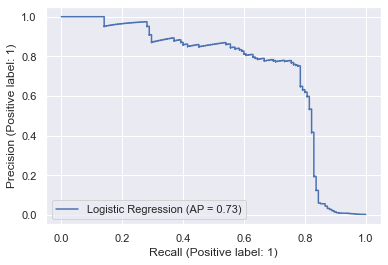

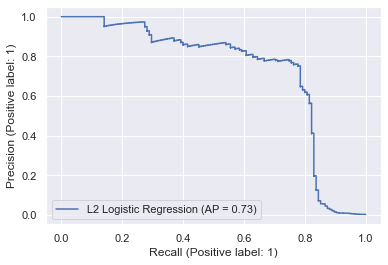

In [25]:
#Use sklearn to plot precision-recall curves

from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(lr, x_test, y_test, name = 'Logistic Regression')
plot_precision_recall_curve(lr_l2, x_test, y_test, name = 'L2 Logistic Regression');

In [26]:
# x = df.iloc[:,:-1]
# y = df.iloc[:,-1]
# skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
# for train_index, test_index in skf.split(x, y):
#     print('Train:',train_index, 'Test:',test_index)
#     original_x_train, original_x_test = x.iloc[train_index], x.iloc[test_index]
#     original_y_train, original_y_test = y.iloc[train_index], y.iloc[test_index]
    
# original_x_train = original_x_train.values
# original_x_test = original_x_test.values
# original_y_train = original_y_train.values
# original_y_test = original_y_test.values

# # see if train  and test labels distributions are similarly distributed
# train_unique_label, train_count_label = np.unique(original_y_train, return_counts=True)
# test_unique_label, test_count_label = np.unique(original_y_test, return_counts=True)
# print('Label distributions:\n')
# print(train_count_label/len(original_y_train))
# print(test_count_label/len(original_y_test))